In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/My Drive"

 bcc201.pdf
 Classroom
'Colab Notebooks'
 Estudos.pdf
 ImersaoDev_Alura
'Iniciação Científica'
'karinemarins_historicoescolar (1).pdf'
'karinemarins_historicoescolar (2).pdf'
 karinemarins_historicoescolar.pdf
'Meet Recordings'
 Modelo_Plano_de_Ensino_BCC221-2021-1.pdf
'MTM112 T81T85T86 professor Isaque Viza de Souza.pdf'
 Obra
'PlanoEnsRemoto Fundamentos GeaCV (1)-convertido.pdf'
'Relatorio TP1 - ED2.gdoc'
 UFOP
'Voluta '
 Wizard


In [3]:
 !pip install 'fsspec>=0.3.3'

In [4]:
import dask.dataframe as dd

In [5]:
df = dd.read_csv('/content/drive/MyDrive/Colab Notebooks/IC/eccomerce/database/olist_geoleocated_encoder.csv')

In [6]:
df.info()


<class 'dask.dataframe.core.DataFrame'>
Columns: 45 entries, Unnamed: 0 to seller_lng
dtypes: float64(19), int64(26)

In [7]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,costumer_lat,costumer_lng,seller_lat,seller_lng
0,0,0,0,1.0,8216,812,22606,58.9,13.29,1.0,1,2.0,72.19,55789,5.0,56,19620,284,22368,22449,1,23079,22564,21672,22509,188,48076,28013,723,18,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-21.763186,-41.310265,-22.497188,-44.127324
1,1,1,7014,1.0,8216,812,13182,55.9,17.96,1.0,0,1.0,73.86,65104,5.0,56,29987,216,13813,85025,1,13379,13135,12760,13731,142,5649,75800,1907,8,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-17.884803,-51.717167,-22.497188,-44.127324
2,2,2,30559,1.0,8216,812,69555,64.9,18.33,1.0,1,2.0,83.23,64310,4.0,4094,28560,538,73540,28995,1,73313,68432,66685,73147,354,18589,30720,443,10,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-19.913964,-43.976106,-22.497188,-44.127324
3,3,3,40954,1.0,8216,812,17142,58.9,16.17,1.0,1,3.0,75.07,48121,5.0,56,192,242,17164,17783,1,17537,17051,15904,17042,164,82561,83070,3470,17,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-25.520334,-49.124988,-22.497188,-44.127324
4,4,4,45875,1.0,8216,812,18388,58.9,13.29,1.0,1,4.0,72.19,24311,5.0,56,192,257,19090,53457,1,18771,18321,17079,18969,169,4247,36400,1016,10,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-20.655379,-43.776331,-22.497188,-44.127324
5,5,5,58794,1.0,8216,812,16757,55.9,26.93,1.0,1,1.0,82.83,73293,5.0,56,192,259,19011,26571,1,16883,16588,15888,19903,163,18290,44560,1185,4,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-12.906138,-39.192076,-22.497188,-44.127324
6,6,6,69027,1.0,8216,812,56807,64.9,38.50,1.0,0,1.0,103.40,66246,5.0,56,13634,470,57888,71997,1,59180,56194,55353,57611,316,17734,45160,442,4,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-15.036469,-41.260324,-22.497188,-44.127324
7,7,7,74190,2.0,8216,812,17990,58.9,18.12,1.0,0,1.0,153.75,80659,5.0,56,192,247,18597,3718,1,18067,17932,16840,17528,172,47060,75903,3109,8,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-17.782743,-50.917956,-22.497188,-44.127324
8,8,8,74190,1.0,8359,812,17990,58.9,17.83,1.0,0,1.0,153.75,80659,5.0,56,192,247,18597,3718,1,18067,17932,16840,17528,172,47060,75903,3109,8,27277.0,582,21,26,54.0,599.0,6.0,530.0,30.0,9.0,14.0,-17.782743,-50.917956,-22.497188,-44.127324
9,9,9,82148,1.0,8216,812,10776,55.9,35.71,2.0,3,1.0,20.00,28668,1.0,56,30742,199,12165,17106,1,11080,10782,10253,11884,128,5361,53403,2681,15,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-7.957598,-34.874754,-22.497188,-44.127324


##Buscando possiveis relações


In [8]:
corr_df = df.corr(method='pearson')


In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

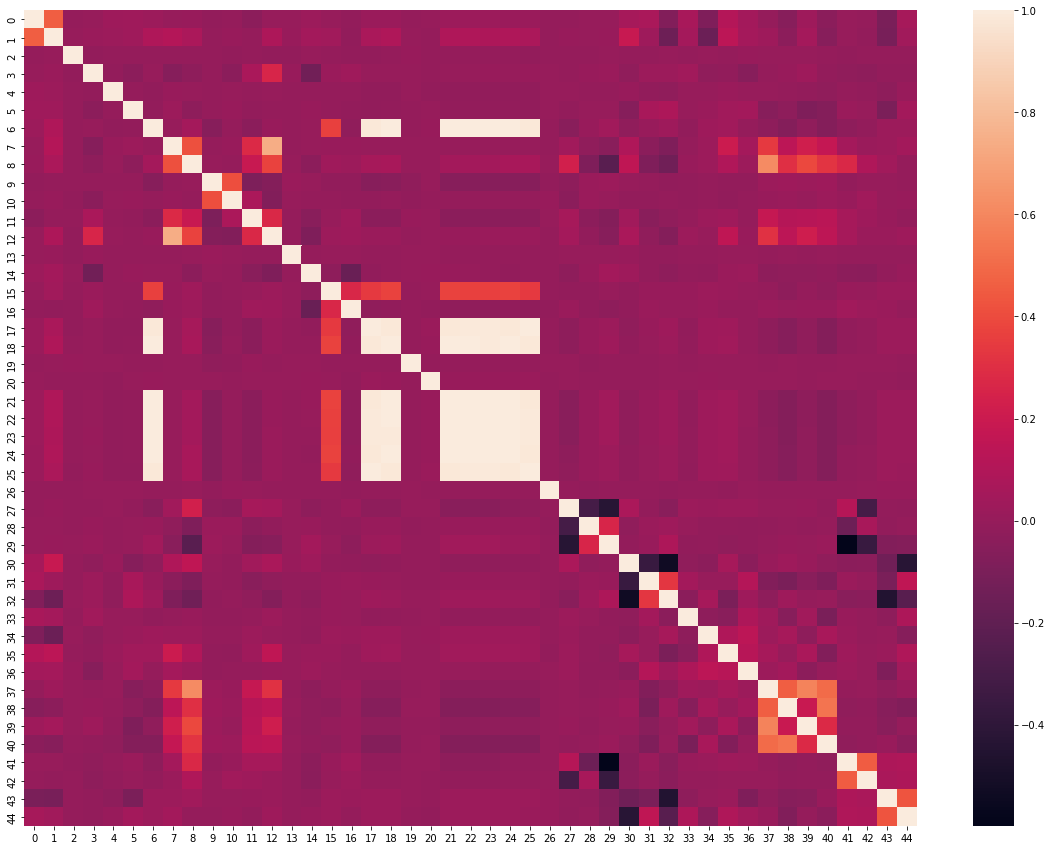

In [16]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_df)
plt.show()

In [12]:
df.compute()

,Unnamed: 0,Unnamed: 0.1,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,costumer_lat,costumer_lng,seller_lat,seller_lng
0,0,0,0,1.0,8216,812,22606,58.90,13.29,1.0,1,2.0,72.19,55789,5.0,56,19620,284,22368,22449,1,23079,22564,21672,22509,188,48076,28013,723,18,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-21.763186,-41.310265,-22.497188,-44.127324
1,1,1,7014,1.0,8216,812,13182,55.90,17.96,1.0,0,1.0,73.86,65104,5.0,56,29987,216,13813,85025,1,13379,13135,12760,13731,142,5649,75800,1907,8,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-17.884803,-51.717167,-22.497188,-44.127324
2,2,2,30559,1.0,8216,812,69555,64.90,18.33,1.0,1,2.0,83.23,64310,4.0,4094,28560,538,73540,28995,1,73313,68432,66685,73147,354,18589,30720,443,10,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-19.913964,-43.976106,-22.497188,-44.127324
3,3,3,40954,1.0,8216,812,17142,58.90,16.17,1.0,1,3.0,75.07,48121,5.0,56,192,242,17164,17783,1,17537,17051,15904,17042,164,82561,83070,3470,17,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-25.520334,-49.124988,-22.497188,-44.127324
4,4,4,45875,1.0,8216,812,18388,58.90,13.29,1.0,1,4.0,72.19,24311,5.0,56,192,257,19090,53457,1,18771,18321,17079,18969,169,4247,36400,1016,10,27277.0,582,21,26,58.0,598.0,4.0,650.0,28.0,9.0,14.0,-20.655379,-43.776331,-22.497188,-44.127324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112655,15175,117719,51471,1.0,4419,499,68016,334.99,24.92,1.0,1,6.0,359.91,9689,5.0,56,192,521,69979,43050,1,71633,66964,65388,70679,351,2687,12095,3732,25,39801.0,122,7,8,57.0,372.0,4.0,2150.0,28.0,28.0,38.0,-23.075592,-45.538315,-17.857908,-41.495395
112656,15177,117721,68647,1.0,19628,2667,70457,22.30,8.88,1.0,0,1.0,31.18,50671,5.0,56,192,535,73062,79185,1,74323,69414,67249,72833,356,30337,1542,3508,25,9961.0,157,21,32,57.0,1417.0,3.0,950.0,35.0,14.0,15.0,-23.570953,-46.624567,-23.702611,-46.596395
112657,15178,117722,70497,1.0,27380,1297,18705,45.00,8.72,1.0,1,5.0,53.72,21766,3.0,56,192,254,18720,18857,1,18246,17794,17832,18450,164,12402,6503,3272,25,8780.0,327,21,54,43.0,642.0,2.0,1000.0,100.0,11.0,20.0,-23.456257,-46.937905,-23.520595,-46.178266
112658,15182,117726,85786,1.0,30175,1772,39544,354.90,18.92,2.0,3,1.0,250.00,84500,5.0,56,192,392,40987,49166,1,40870,39205,37875,40836,265,6881,89642,3702,23,39442.0,266,7,32,53.0,234.0,2.0,217.0,26.0,11.0,26.0,-27.101374,-51.246351,-15.801399,-43.310325


In [13]:
corr_especific= df[['price','freight_value','payment_type','review_score','product_category_name']].corr(method='pearson')


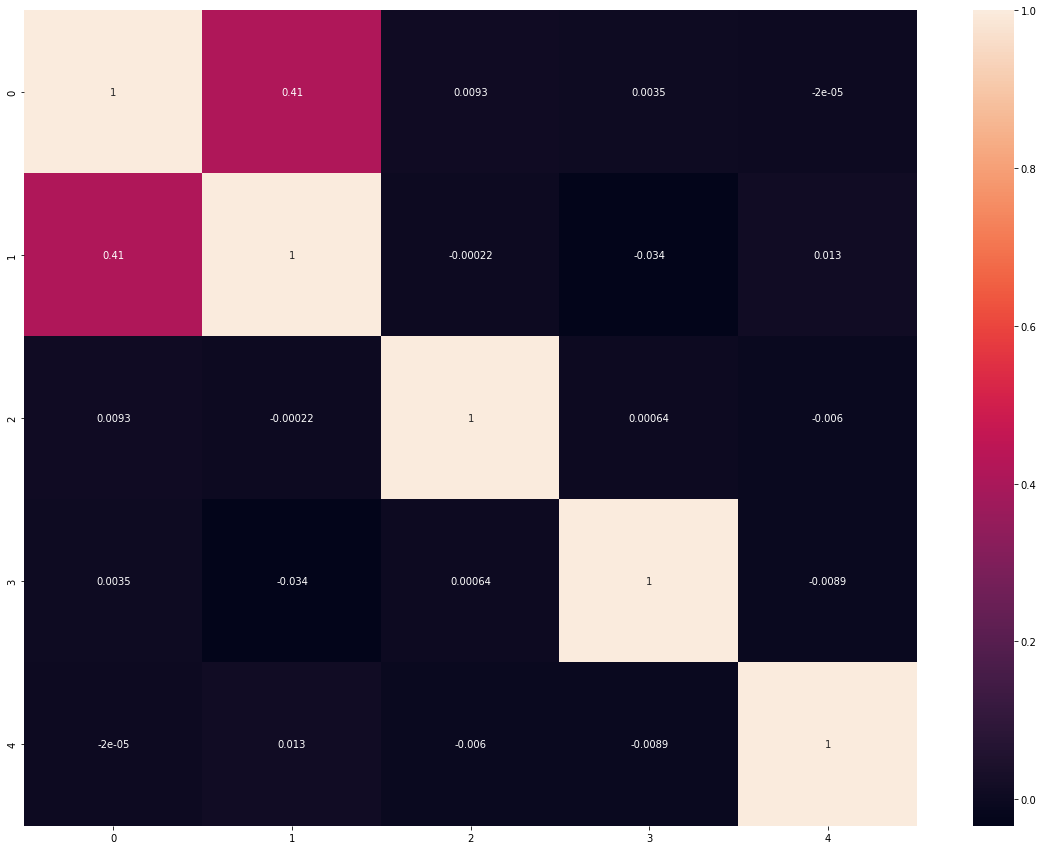

In [14]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_especific, annot=True)
plt.show()

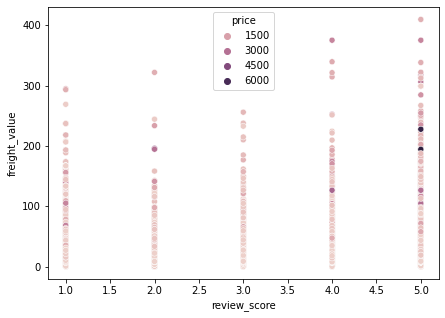

In [15]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='review_score', y='freight_value', hue='price');

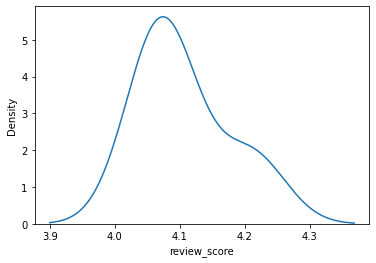

In [21]:
sns.kdeplot(df.groupby(['payment_type'])['review_score'].mean());

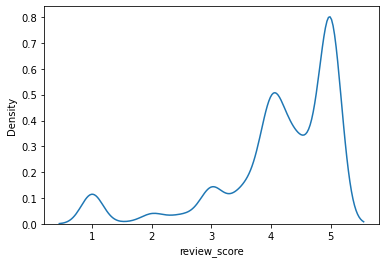

In [29]:
sns.kdeplot(df.groupby(['price'])['review_score'].mean());

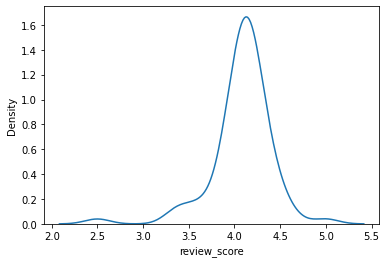

In [30]:
sns.kdeplot(df.groupby(['product_category_name'])['review_score'].mean());